In [790]:
!pip install --upgrade transformers

     |████████████████████████████████| 4.2 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.18.0
    Uninstalling transformers-4.18.0:
      Successfully uninstalled transformers-4.18.0


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
import torch
torch.__version__

In [ ]:
embeddings.shape

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentence = ['once upon a time, there was a group of tiny frogs who arranged a competition. \
the goal was to reach the top of a tower. a huge crowd of frogs gathered to watch the race. the race']

query_neg = ['audience']
query_pos = ['once']

sentence_embedding = model.encode(sentence)
query_neg_embedding = model.encode(query_neg)
query_pos_embedding = model.encode(query_pos)

print("Positive Similarity:", util.cos_sim(query_pos_embedding, sentence_embedding))
print("Negative Similarity:", util.cos_sim(query_neg_embedding, sentence_embedding))

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentence = ['once upon a time, there was a group of tiny frogs who arranged a competition. \
the goal was to reach the top of a tower. a huge crowd of frogs gathered to watch the race. the race']

#query_neg = ['audience']
#query_pos = ['once']

sentence_embedding = model.encode(sentence)

word_list = sentence[0].split(" ")
score_list = [util.dot_score(model.encode(word), sentence_embedding).item() for word in word_list]

for idx in np.argsort(score_list)[::-1].tolist():
    print(f"{word_list[idx]}, {score_list[idx]}")

In [ ]:
import re
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentence = ['once upon a time, there was a group of tiny frogs who arranged a competition. \
the goal was to reach the top of a tower. a huge crowd of frogs gathered to watch the race. the race']

sentencea = ['once upon a time, there was a [mask] of tiny frogs who arranged a competition. \
the goal was to reach the top of a tower. a huge crowd of frogs gathered to watch the race. the race']

sentence_embedding = model.encode(sentence)

#query_neg = ['audience']
#query_pos = ['once']
scores = []
for idx, word in enumerate(sentence[0].split(" ")):
    #print(word)
    new_sent = ' '.join(sentence[0].split(" ")[0:idx] + sentence[0].split(" ")[idx+1:])
    #print(new_sent)
    new_sent_embedding = model.encode(new_sent)
    scores.append(
        util.cos_sim(sentence_embedding, sentence_embedding).item() - util.cos_sim(new_sent_embedding, sentence_embedding).item()
    )
for idx in np.argsort(scores)[::-1]:
    print(f'{idx}, {sentence[0].split(" ")[idx]}, {scores[idx]}' )

In [ ]:
util.cos_sim(sentence_embedding, sentence_embedding).item()

In [ ]:
print(len(sentence[0].split(" ")))
print(len(word_embedding_list))

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentence = ['a, b, c, z, y, x, o, u']

query_neg = ['m']
query_pos = ['c']

sentence_embedding = model.encode(sentence)
query_neg_embedding = model.encode(query_neg)
query_pos_embedding = model.encode(query_pos)

print("Positive Similarity:", util.dot_score(query_pos_embedding, sentence_embedding))
print("Negative Similarity:", util.dot_score(query_neg_embedding, sentence_embedding))

In [ ]:
from scipy.stats import ortho_group

In [ ]:
orthonormal_vectors = ortho_group.rvs(dim=(512))
print(orthonormal_vectors.shape)

In [ ]:
print("Positive Similarity:", util.dot_score(orthonormal_vectors[2], orthonormal_vectors[2]))
print("Negative Similarity:", util.dot_score(orthonormal_vectors[0], orthonormal_vectors[2]))

In [ ]:
import numpy as np

In [ ]:
# sequence with orthonormal vectors
seqa = [orthonormal_vectors[0], orthonormal_vectors[20], orthonormal_vectors[40], orthonormal_vectors[80]]

In [ ]:
seqb = np.mean(seqa, axis=0)
print(seqb.shape)

In [ ]:
print("Positive Similarity:", util.dot_score(orthonormal_vectors[0], seqb))
print("Negative Similarity:", util.dot_score(orthonormal_vectors[1], seqb))

In [11]:
# create dataset with positive and negative examples; to prevent any issues with the pre-trained model 
# trained with the same dataset as the test dataset
import requests
from pathlib import Path
import hashlib
import re
import sys
import tarfile
import pandas as pd
pd.options.display.max_colwidth = 100
pd.set_option('display.max_colwidth', None)

In [772]:
# wiki dump from - https://dumps.wikimedia.org/other/kiwix/zim/wikipedia/wikipedia_en_all_nopic_2022-01.zim
# parse wiki dumps - https://github.com/jojolebarjos/wikipedia-text
!pip install lxml tqdm

     |████████████████████████████████| 6.4 MB 4.4 MB/s eta 0:00:01


In [775]:
!wget https://dumps.wikimedia.org/other/kiwix/zim/wikipedia/wikipedia_en_all_nopic_2022-01.zim 

--2022-05-25 18:26:31--  https://dumps.wikimedia.org/other/kiwix/zim/wikipedia/wikipedia_en_all_nopic_2022-01.zim
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49479703351 (46G) [application/octet-stream]
Saving to: ‘wikipedia_en_all_nopic_2022-01.zim’

wikipedia_en_all_no 100%[===================>]  46.08G  4.53MB/s    in 2h 54m  

2022-05-25 21:20:35 (4.52 MB/s) - ‘wikipedia_en_all_nopic_2022-01.zim’ saved [49479703351/49479703351]



In [777]:
!python extract.py wikipedia_en_all_nopic_2022-01.zim en.xml.gz en

Discovering items...
100%|████████████████████████████| 16732745/16732745 [06:20<00:00, 43934.81it/s]
Writing redirections...
100%|██████████████████████████████| 9835262/9835262 [02:35<00:00, 63436.25it/s]
Writing articles...
  0%|                                               | 0/6431329 [00:02<?, ?it/s]
Traceback (most recent call last):
  File "extract.py", line 619, in <module>
    process(args.input, args.output, args.language)
  File "extract.py", line 592, in process
    subfile.seek(start + offsets[blob_index])
OSError: [Errno 22] Invalid argument


In [ ]:
!python convert.py en.xml.gz en.txt

In [778]:
# extractor from https://github.com/attardi/wikiextractor
# data from https://dumps.wikimedia.org/wikidatawiki/20220520/
!pip install wikiextractor

     |████████████████████████████████| 46 kB 2.4 MB/s eta 0:00:011


In [779]:
!python -m wikiextractor.WikiExtractor wikidatawiki-20220520-pages-articles-multistream12.xml-p19170285p19883157.bz2

INFO: Preprocessing 'wikidatawiki-20220520-pages-articles-multistream12.xml-p19170285p19883157.bz2' to collect template definitions: this may take some time.
INFO: Preprocessed 100000 pages
INFO: Preprocessed 200000 pages
INFO: Preprocessed 300000 pages
INFO: Preprocessed 400000 pages
INFO: Preprocessed 500000 pages
INFO: Preprocessed 600000 pages
INFO: Loaded 226 templates in 274.4s
INFO: Starting page extraction from wikidatawiki-20220520-pages-articles-multistream12.xml-p19170285p19883157.bz2.
INFO: Using 127 extract processes.
INFO: Extracted 100000 articles (2920.0 art/s)
INFO: Extracted 200000 articles (2792.4 art/s)
INFO: Extracted 300000 articles (2821.5 art/s)
INFO: Extracted 400000 articles (1413.2 art/s)
INFO: Extracted 500000 articles (2826.4 art/s)
INFO: Extracted 600000 articles (1574.3 art/s)
INFO: Finished 127-process extraction of 627031 articles in 284.7s (2202.4 art/s)


In [783]:
!python -m wikiextractor.WikiExtractor /data/sherin/lm_dataset_recall/wikipedia_en_all_nopic_2022-01.zim --json

Traceback (most recent call last):
  File "/opt/conda/envs/tf14/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/tf14/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/tf14/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py", line 645, in <module>
    main()
  File "/opt/conda/envs/tf14/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py", line 641, in main
    args.compress, args.processes, args.html_safe)
  File "/opt/conda/envs/tf14/lib/python3.7/site-packages/wikiextractor/WikiExtractor.py", line 301, in process_dump
    for line in input:
  File "/opt/conda/envs/tf14/lib/python3.7/codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfa in position 10: invalid start byte


In [792]:
!pip install --upgrade datasets

In [794]:
!pip install apache_beam mwparserfromhell

     |████████████████████████████████| 10.3 MB 2.2 kB/s eta 0:00:01
     |████████████████████████████████| 176 kB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 53.0 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 46 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 7.3 MB/s  eta 0:00:01
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
     |████████████████████████████████| 26.7 MB 42.1 MB/s eta 0:00:01
  Created wheel for crcmod: filename=crcmod-1.7-cp37-cp37m-linux_x86_64.whl size=36530 sha256=2441143d6c45ff625cc52b7734adb97867703e5bc1bc0977ffb235214e888e2f
  Stored in directory: /root/.cache/pip/wheels/dc/9a/e9/49e627353476cec8484343c4ab656f1e0d783

In [21]:
!pip install psutil

     |████████████████████████████████| 281 kB 4.5 MB/s eta 0:00:01


In [23]:
from datasets import load_dataset
import os; import psutil; import timeit

# Process.memory_info is expressed in bytes, so convert to megabytes 
mem_before = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
wiki = load_dataset("wikipedia", "20220301.en")
mem_after = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

print(f"RAM memory used: {(mem_after - mem_before)} MB")

#wiki_simple_ds = load_dataset("wikipedia", "20220301.simple", split='train')


Downloading:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/20.3G [00:00<?, ?B/s]

Dataset wikipedia downloaded and prepared to /root/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

RAM memory used: 47.71875 MB


In [34]:
wiki

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'text'],
        num_rows: 6458670
    })
})

In [32]:
wiki['train'].column_names

['id', 'url', 'title', 'text']

In [19]:
wiki_simple_ds.info

DatasetInfo(description='Wikipedia dataset containing cleaned articles of all languages.\nThe datasets are built from the Wikipedia dump\n(https://dumps.wikimedia.org/) with one split per language. Each example\ncontains the content of one full Wikipedia article with cleaning to strip\nmarkdown and unwanted sections (references, etc.).\n', citation='@ONLINE {wikidump,\n    author = {Wikimedia Foundation},\n    title  = {Wikimedia Downloads},\n    url    = {https://dumps.wikimedia.org}\n}\n', homepage='https://dumps.wikimedia.org', license='', features={'id': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='wikipedia', config_name='20220301.simple', version=2.0.0, splits={'train': SplitInfo(name='train', num_bytes=235072360, num_examples=205328, dataset_name='wikipedia')}, download_checksums={}, download_siz

In [1]:
import tensorflow as tf

2022-05-26 14:47:31.140642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-05-26 14:47:31.140694: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.9.1'

In [4]:
!pip install --upgrade tensorflow

     |███████████████████▏            | 307.0 MB 90.1 MB/s eta 0:00:033MB/s eta 0:00:03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████▊     | 428.1 MB 76.3 MB/s eta 0:00:02

     |███████████████████████████▏    | 434.5 MB 76.3 MB/s eta 0:00:02

     |███████████████████████████▌    | 439.7 MB 76.3 MB/s eta 0:00:01

     |███████████████████████████▉    | 445.4 MB 76.3 MB/s eta 0:00:01

     |████████████████████████████▏   | 450.9 MB 76.3 MB/s eta 0:00:01

     |████████████████████████████▋   | 456.8 MB 76.3 MB/s eta 0:00:01

     |█████████████████████████████   | 462.7 MB 76.3 MB/s eta 0:00:01

     |█████████████████████████████▎  | 468.3 MB 76.3 MB/s eta 0:00:01

     |█████████████████████████████▊  | 474.5 MB 76.3 MB/s eta 0:00:01

     |██████████████████████████████  | 480.3 MB 76.3 MB/s eta 0:00:01

     |██████████████████████████████▍ | 485.8 MB 76.3 MB/s eta 0:00:01

     |██████████████████████████████▋ | 490.1 MB 76.3 MB/s eta 0:00:01

     |███████████████████████████████ | 495.4 MB 76.3 MB/s eta 0:00:01

     |███████████████████████████████▎| 500.2 MB 76.3 MB/s eta 0:00:01

     |███████████████████████████████▋| 506.0 MB 135.5 MB/s eta 0:00:01

     |████████████████████████████████| 511.7 MB 135.5 MB/s eta 0:00:01

     |████████████████████████████████| 511.7 MB 5.0 kB/s 
     |████████████████████████████████| 1.6 MB 109.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 112.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 94.8 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 52.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 104.8 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 107.8 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 94.2 MB/s eta 0:00:01
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Atte

In [12]:
# Download the dataset
fname = 'wikitext-103.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-wikitext-103/1.0.1/' + fname
r = requests.get(url)
Path(fname).write_bytes(r.content)

189603606

In [13]:
# Verify the file was downloaded properly by comparing sha512 checksums
sha512sum = 'c8186919aa1840af6b734ea41abc580574ea8efe2fafda220f5d01002464d17566d84be5199b875136c9593f0e0678fb5d7c84bb2231de8b4151cb9c83fa2109'
sha512sum_computed = hashlib.sha512(Path('wikitext-103.tar.gz').read_bytes()).hexdigest()
sha512sum == sha512sum_computed

True

In [14]:
# Extract the dataset
with tarfile.open(fname) as tar:
    tar.extractall()

In [15]:
test_data = Path('wikitext-103/wiki.test.tokens').read_text()

In [16]:
# Store regular expression pattern to search for wikipedia article headings
heading_pattern = '( \n \n = [^=]*[^=] = \n \n )'

In [17]:
# Split out test headings and articles
test_split = re.split(heading_pattern, test_data)
test_headings = [x[7:-7] for x in test_split[1::2]]
test_articles = [x for x in test_split[2::2]]

In [18]:
# Do we need tokens . and , and '? for now retain as span bert may rely on them for predictions
# remove any unkowns in the sentence as well
clean_articles = []
for idx in range(len(test_articles)):
    clean_text = re.sub('[^ a-zA-Z0-9.\',?]|unk', '', test_articles[idx])
    clean_text = re.sub(' +', ' ', clean_text)
    clean_articles.append(clean_text)



In [ ]:
"""
# Tokenize sentences so that they have equal length.
# convert the paragraphs into sentences of tokens with max length = 20
max_words=100
# sentences_ds is a list of lists, each entry in the list will be sentences from an article
sentences_ds = []
for idx in range(len(clean_articles)):
    words = clean_articles[idx].split(" ")
    num_words = len(words)
    for i in range(0, num_words, max_words):
        if len(words[i:i+max_words]) < max_words:
            continue
        sentence = " ".join(words[i:i+max_words])
        sentences_ds.append(sentence)

import math
train_size = math.floor(len(sentences_ds)*0.8)
test_size = math.floor(len(sentences_ds)*0.1)
val_size = math.floor(len(sentences_ds)*0.1)
print(train_size)
print(test_size)
print(val_size)

train_set = sentences_ds[0:train_size]
val_set = sentences_ds[train_size:train_size+val_size]
test_set = sentences_ds[train_size+val_size:]

from nltk.tokenize import word_tokenize

def create_dataframe(dataset, df):
    input_sequence = []
    query = []
    target = []
    pos_count = 0
    neg_count = 0
    for sent in dataset:
        # get the non-trivial token devoid of .,?
        new_sent = re.sub('[.,?]', '', sent)
        word_list = word_tokenize(new_sent)
        query_token = word_list[-1]
        input_seq = ' '.join(word_list[:-1])
        if query_token in word_list[:-1]:
            tgt=1
            pos_count = pos_count+1
        else:
            tgt=0  
            neg_count = neg_count+1
        input_sequence.append(input_seq)
        query.append(query_token)
        target.append(tgt)

    df["input_string"] = input_sequence
    df["query"] = query
    df["target"] = target
    
    return df, pos_count, neg_count

column_names = ["input_string", "query", "target"]

df_train = pd.DataFrame(columns = column_names)
df_test = pd.DataFrame(columns = column_names)
df_val = pd.DataFrame(columns = column_names)

df_train, pos_count_train, neg_count_train = create_dataframe(train_set, df_train)
df_test, pos_count_test, neg_count_test = create_dataframe(test_set, df_test)
df_val, pos_count_val, neg_count_val = create_dataframe(val_set, df_val)

print("Number of positive examples in training dataset is : {} and number of negative examples are: {}".format(pos_count_train, neg_count_train))

print("Number of positive examples in test dataset is : {} and number of negative examples are: {}".format(pos_count_test, neg_count_test))

print("Number of positive examples in Validation dataset is : {} and number of negative examples are: {}".format(pos_count_val, neg_count_val))

"""

In [ ]:
#TODO remove this we want to tokenize equal length sentences.
"""
from nltk.tokenize import sent_tokenize
sentences_ds = []
for idx in range(len(clean_articles)):
    sentences_ds.extend(sent_tokenize(clean_articles[idx]))
"""

In [ ]:
# https://arxiv.org/pdf/1905.05583.pdf - max seq length for bert is 512, so limit query length to max 512.

In [ ]:
# lemmatize the entire dataset
from nltk.tokenize import sent_tokenize
sentences_ds = []
for idx in range(len(clean_articles)):
    sentences_ds.extend(sent_tokenize(clean_articles[idx]))

In [50]:
# lemmatized_ds has all the lemmatized words from the text
# lemmatized_senteces and sentences_ds has a 1:1 correspondence one contains the lemmatized 
# sentences and the other contains the original sentence.
"""
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
lemmatized_ds = []
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = []

for sent in sentences_ds:
    word_list = nltk.word_tokenize(sent)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    #print(lemmatized_output)
    lemmatized_sentences.extend([lemmatized_output])
    #print(lemmatized_sentences[0])
    lemmatized_ds.extend(lemmatized_output.split(" "))
"""

In [ ]:
# instead of using clean articles you can now use lemmatized_ds
# create a dictionary with unique words in lemmatized_ds and the synonyms of it
#https://www.nltk.org/howto/wordnet.html
"""
from nltk.corpus import wordnet as wn

word_dict = {}
for word in lemmatized_ds:
    if word not in word_dict:
        synonym_list = wn.synsets(word)
        # the words returned in this list are of the form: dog.n.01
        synonym_name_list = []
        for synonym in synonym_list:
            syn_name = synonym.name().split(".")[0]
            # do not make duplicate entries in synonym list
            # synset returns entries that are repetitive
            if syn_name not in synonym_name_list:
                synonym_name_list.append(syn_name)
        # add the word also in the list, so that searching becomes easier later on
        if word not in synonym_name_list:
            synonym_name_list.append(word)
        word_dict[word] = synonym_name_list
    else:
        print("{} already exists in the dictionary".format(word))
"""

In [ ]:
"""
for key, val in word_dict.items():
    print("Key : {} Val: {}".format(key, val))
"""

In [15]:
# https://arxiv.org/pdf/1905.05583.pdf - max seq length for bert is 512, so limit query length to max 512.
# so we will chunk up the data into 512 words each
"""
max_seq_len = 512
lemmatized_chunks = [lemmatized_ds[idx:idx+max_seq_len] for idx in range(0, len(lemmatized_ds), max_seq_len)]
"""

In [175]:
max_seq_len = 512

def get_end_id(lemmatized_sentences_list, start_id):
    num_words = 0
    
    for ind in range(start_id, len(sentences_ds)):
        num_words += len(sentences_ds[ind].split(" "))
        #print("Num words: {}".format(num_words))
        #print("Sent len: {}".format(len(sentences_ds[ind].split(" "))))
        if num_words > max_seq_len:
            return ind
            

In [ ]:
len(lemmatized_chunks[236])

In [ ]:
from IPython.core.debugger import set_trace

In [ ]:
# for the VAD values read from NRC-VAD-Lexicon.txt
columns = ["word", "valence", "arousal", "dominance"]
vad_df = pd.DataFrame(columns=columns)

import csv

word_list = []
valence = []
arousal = []
dominance = []

with open("NRC-VAD-Lexicon.txt") as tsv:
    for line in csv.reader(tsv, delimiter='\t'):
        word_list.append(line[0])
        valence.append(line[1])
        arousal.append(line[2])
        dominance.append(line[3])

vad_df["word"] = word_list
vad_df["valence"] = valence
vad_df["arousal"] = arousal
vad_df["dominance"] = dominance

In [89]:
def lemmatize_query(query_word):
    lemmatized_query = lemmatizer.lemmatize(query_word)
    return lemmatized_query

In [136]:
def lemmatize_context(context):
    lemmatized_output = []
    for w in context:
        lemmatized_output.append(lemmatizer.lemmatize(w))
    return lemmatized_output
        

In [200]:
def get_label(query, context):
    # evaluate verbatim recall for now so do not lemmatize or consider synonyms
    #lemmatized_query = lemmatize_query(query)
    # nltk sentence tokenizer doesnt split words properly - e.g. is split as e.g and . and then lemmatized
    # but lemmatization of e.g. is e.g. so you will not find lemmatized query in word_dict 
    # in such cases just take the query word as is 
    """
    if lemmatized_query in word_dict:
        expanaded_query = word_dict[lemmatized_query]
    else:
        expanaded_query = lemmatized_query
    """
    # lemmatize the context 
    #lemmatized_context = lemmatize_context(context)
    """
    if (set(expanaded_query) & set(lemmatized_context)):
        label = 1
    else:
        label = 0
    """
    if query in context:
        label = 1
    else:
        label = 0
    #print(f'context: {" ".join(context)}, query: {query}, label: {label}, length {len(context)}')
    return label  

In [141]:
from tqdm import tqdm

In [ ]:
new_sentences_ds = sentences_ds[50]

In [398]:
!pip install line_profiler

     |████████████████████████████████| 67 kB 3.8 MB/s eta 0:00:011


In [411]:
spl_char = ['.', '\'', '?', ',']

data = []

for sent_id in tqdm(range(len(sentences_ds))):
#for send_id in tqdm(range(10)):
    end_id = get_end_id(sentences_ds, sent_id)
    #print("End id: {}".format(end_id))
    #print("Start id: {}".format(sent_id))
    chunk_clean = " ".join(sentences_ds[sent_id:end_id]).split(" ") 
    #print("Len chunk {}".format(len(chunk_clean)))
    #print(chunk_clean)

    for idx, query in enumerate(chunk_clean[1:]):
        #print(len(query)
        if query not in spl_char and not query.isnumeric():
            context = chunk_clean[:idx+1]
            # use lemmatized chunk only for generating label
            label = get_label(query, context)
            #query_lemmatized = lemmatizer.lemmatize(query)
            """
            doc = nlp(query)
            query_lemmatized_spacy = [token.lemma_ for token in doc][0]
            num_meanings = len(wn.synsets(query_lemmatized))
            vad_word = vad_df.loc[vad_df["word"] == query_lemmatized]
            if not vad_word.empty:
                valence = float(vad_word["valence"].values[0])
                arousal = float(vad_word["arousal"].values[0])
                dominance = float(vad_word["dominance"].values[0])
            else:
                valence = -1
                arousal = -1
                dominance = -1
            pos = nltk.pos_tag([query_lemmatized])[0][1]
            if label == 1:
                intervening_tokens = len(context) - context.index(query)
                num_repeats = context.count(query)
            else:
                intervening_tokens = -1
                num_repeats = -1
            
            data.append({"query": query, "context": " ".join(context), "label": label, "context_length": len(context), 
                         "number_meanings":num_meanings, "valence": valence, "arousal": arousal, 
                         "dominance": dominance, "pos":pos, "inter_tokens":intervening_tokens, "num_rep":num_repeats}
                       )
            """
            data.append({"query": query, "context": " ".join(context), "label": label, "context_length": len(context)})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9468/9468 [00:35<00:00, 267.55it/s]


In [412]:
df = pd.DataFrame(data)

In [425]:
"""
def get_lemmatized_query(df):
    query = list(set(df["query"].to_list()))
    doc = nlp(' '.join(query))
    query_lemmatized_spacy = [token.lemma_ for token in doc]
    print(len(query))
    print(len(query_lemmatized_spacy))
    assert len(query_lemmatized_spacy) == len(query)
    dd = {}
    for q_ori, q_lem in zip(query, query_lemmatized_spacy):
        dd[q_ori] = q_lem
    df["lemmatized_query"] = df["query"].replace(dd)
    return df
"""

In [461]:
def get_vad(df, vad_df):
    df = pd.merge(df, vad_df, how='left', left_on = 'query', right_on = "word")
    df = df.drop(columns = ["word"])
    return df
    

In [466]:
df_vad = get_vad(df, vad_df).dropna()


In [468]:
len(df_vad)

1087843

In [469]:
def get_synsets(a):
    return len(wn.synsets(a))

In [471]:
df_vad["num_meanings"] = df_vad["query"].apply(get_synsets)

In [615]:
def get_count(c, q):
    try:
        count = c.count(q)
    except:
        count = -1
    
    return count
        

In [624]:
def get_intervening_tokens(c, q, l):
    try:
        int_tok = l - c.split(" ").index(q) - 1
    except:
        int_tok = -1
    
    return int_tok

In [627]:
df_vad["num_rep"] = df_vad.apply(lambda x: get_count(x['context'], x['query']), axis=1)
df_vad["int_tok"] = df_vad.apply(lambda x: get_intervening_tokens(x['context'], x['query'], x['context_length']), axis=1) 

In [628]:
len(df_vad)

1087843

In [629]:
a = df_vad.loc[df_vad['label'] == 1]

In [630]:
a.head(n=1)

,query,context,label,context_length,valence,arousal,dominance,num_meanings,num_rep,int_tok
32,greatest,"Du Fu Wade Giles Tu Fu Chinese 712 770 was a prominent Chinese poet of the Tang dynasty . Along with Li Bai Li Po , he is frequently called the greatest of the Chinese poets . His",1,38,0.847,0.627,0.922,7,1,6


In [631]:
df_vad.head(n=2)

,query,context,label,context_length,valence,arousal,dominance,num_meanings,num_rep,int_tok
8,prominent,Du Fu Wade Giles Tu Fu Chinese 712 770 was a,0,11,0.676,0.627,0.779,2,0,-1
10,poet,Du Fu Wade Giles Tu Fu Chinese 712 770 was a prominent Chinese,0,13,0.827,0.350,0.556,1,0,-1


In [647]:
df_balanced = df_vad[df_vad.groupby(["query"])["label"].transform('mean')>0.0]

In [695]:
df_balanced.groupby(["query", "label"], group_keys=False).apply(lambda x: len(x))

query      label
abandoned  0        433
           1         60
abbot      0         50
           1         86
ability    0        284
                   ... 
yield      1          4
youth      0        314
           1         21
zone       0        238
           1         73
Length: 4660, dtype: int64

In [696]:
df_vad_pos = df_vad[df_vad['label'] == 1]
df_vad_neg = df_vad[df_vad['label'] == 0]

In [719]:
query_count = df_vad_pos.groupby('query').apply(lambda x: len(x)).to_dict()

In [730]:
sampled_df_vad_neg = df_vad_neg.groupby('query', group_keys=False).apply(
    lambda x: x.sample(n=query_count[x.iloc[0]["query"]] 
                       if ((x.iloc[0]["query"] in query_count) and (len(x)>query_count[x.iloc[0]["query"]])) else 0)
)

In [742]:
query_neg = (sampled_df_vad_neg.groupby('query').size() - df_vad_pos.groupby('query').size()).dropna().index.to_list()

In [744]:
sampled_df_vad_pos = df_vad_pos.groupby('query', group_keys=False).apply(
    lambda x: x.sample(n=len(x) 
                       if (x.iloc[0]["query"] in query_neg) else 0)
)

In [750]:
sampled_df_vad = pd.concat([sampled_df_vad_pos, sampled_df_vad_neg])

<AxesSubplot:>

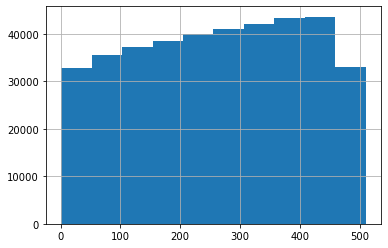

In [760]:
sampled_df_vad['context_length'].hist()

<AxesSubplot:>

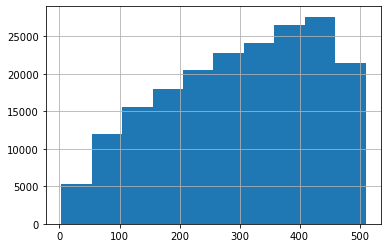

In [761]:
sampled_df_vad[sampled_df_vad['label'] == 1]['context_length'].hist()

<AxesSubplot:>

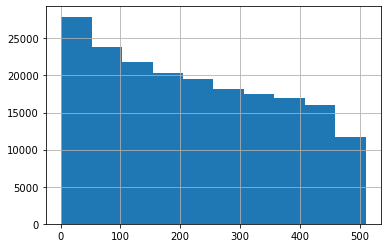

In [762]:
sampled_df_vad[sampled_df_vad['label'] == 0]['context_length'].hist()

In [454]:
"""
def pp():
    spl_char = ['.', '\'', '?', ',']

    data = []

    for sent_id in tqdm(range(len(sentences_ds))):
    #for send_id in tqdm(range(10)):
        end_id = get_end_id(sentences_ds, sent_id)
        #print("End id: {}".format(end_id))
        #print("Start id: {}".format(sent_id))
        chunk_clean = " ".join(sentences_ds[sent_id:end_id]).split(" ") 
        #print("Len chunk {}".format(len(chunk_clean)))
        #print(chunk_clean)

        for idx, query in enumerate(chunk_clean[1:]):
            
            if query not in spl_char and not query.isnumeric():
                context = chunk_clean[:idx+1]
                # use lemmatized chunk only for generating label
                label = get_label(query, context)
                query_lemmatized = lemmatizer.lemmatize(query)
                doc = nlp(query)
                #query_lemmatized_spacy = [token.lemma_ for token in doc][0]
                num_meanings = len(wn.synsets(query_lemmatized))
                vad_word = vad_df.loc[vad_df["word"] == query_lemmatized]
                if not vad_word.empty:
                    valence = float(vad_word["valence"].values[0])
                    arousal = float(vad_word["arousal"].values[0])
                    dominance = float(vad_word["dominance"].values[0])
                else:
                    valence = -1
                    arousal = -1
                    dominance = -1
                pos = nltk.pos_tag([query_lemmatized])[0][1]
                if label == 1:
                    intervening_tokens = len(context) - context.index(query)
                    num_repeats = context.count(query)
                else:
                    intervening_tokens = -1
                    num_repeats = -1
                data.append({"query": query, "context": " ".join(context), "label": label, "context_length": len(context), 
                             "number_meanings":num_meanings, "valence": valence, "arousal": arousal, 
                             "dominance": dominance, "pos":pos, "inter_tokens":intervening_tokens, "num_rep":num_repeats}
                           )
"""

In [406]:
#%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [407]:
#%lprun -f pp pp()

  0%|                                                                                                                                       | 4/9468 [00:14<9:22:15,  3.56s/it]

*** KeyboardInterrupt exception caught in code being profiled.

In [ ]:
"""
# generate word cloud to capture the most frequently occuring words
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
!pip install wordcloud
"""

In [8]:
"""
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = [df["query"].iloc[idx] for idx in range(0, len(df["query"]))]
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(text))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

In [ ]:
#df_vad has all around 1 million examples

In [763]:
sampled_df_vad.to_pickle("balanced_inputs.pkl")

In [765]:
sampled_df_vad.to_csv("balanced_lm_recall.csv", sep="\t")

In [771]:
len(sampled_df_vad)

387216

In [780]:
len(sampled_df_vad['query'].unique())

2095